In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
#importing csv file
df = pd.read_csv('../data/combined_cleaned_vectorized.csv')

In [10]:
# Get the list of English stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

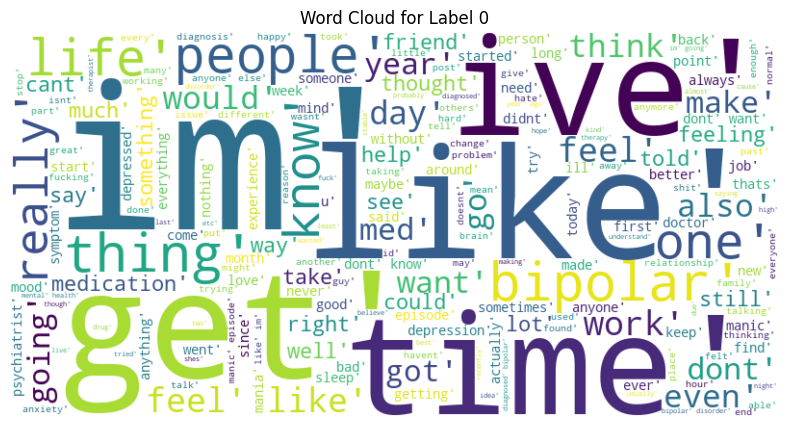

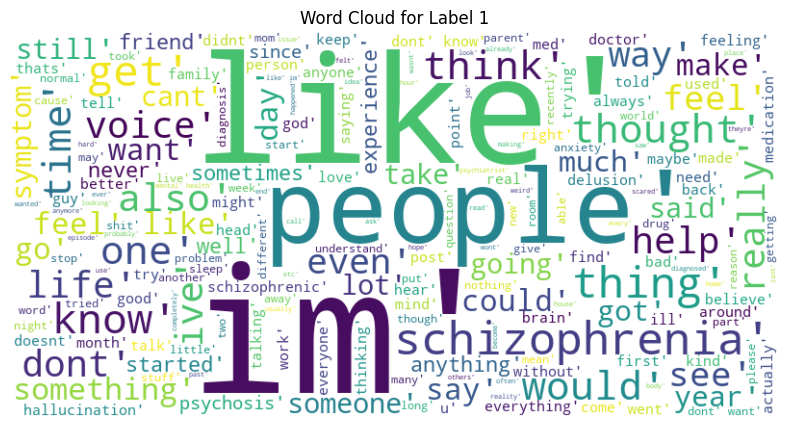

In [11]:
# Separate the data by label
df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]

# Create a word cloud for each label
for i, df_label in enumerate([df_0, df_1]):
    # Combine all the text for this label
    text = ' '.join(df_label['text'])
    # Create a word cloud
    wordcloud = WordCloud(stopwords=stop_words, width=800, height=400, background_color='white').generate(text)
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label {i}')
    plt.show()



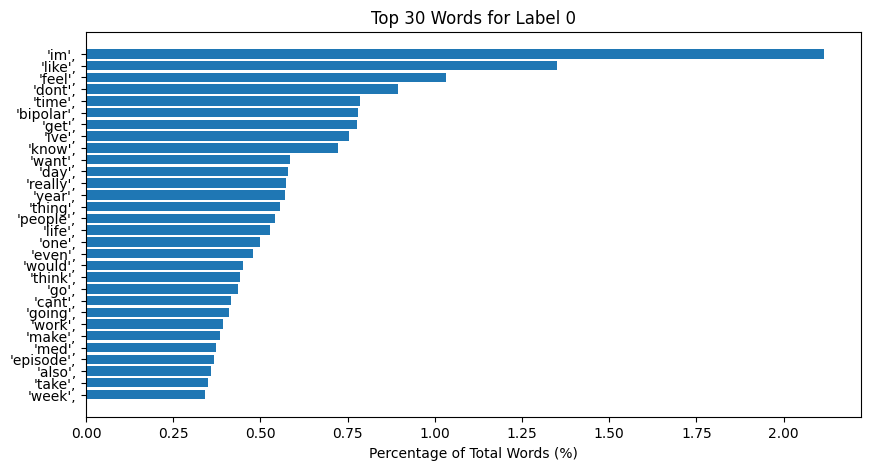

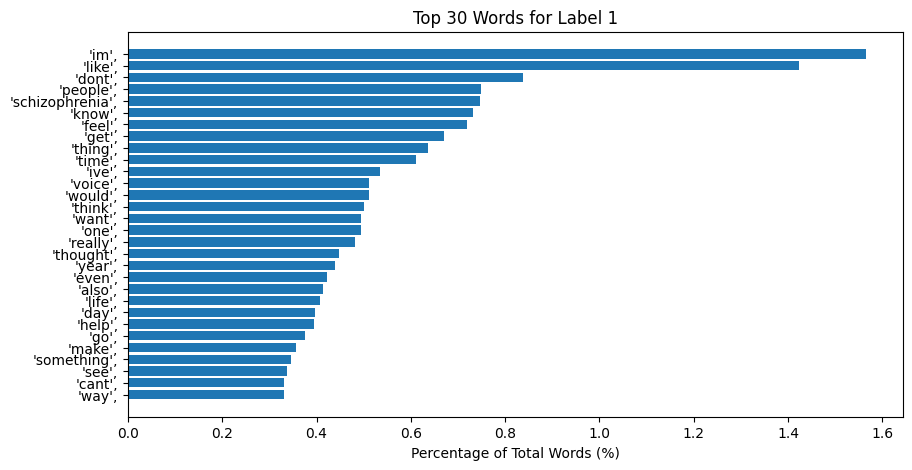

In [14]:
# Find the most common words for each label
for i, df_label in enumerate([df_0, df_1]):
    # Combine all the text for this label
    text = ' '.join(df_label['text'])
    words = text.split()

    # Get the top 30 words for this label
    top_30 = pd.Series(words).value_counts()[:30]

    # Calculate the percentage of the total tokenized words
    top_30 = top_30 / len(words) * 100

    # Plot the top 30 words
    plt.figure(figsize=(10, 5))
    plt.barh(top_30.index, top_30.values)
    plt.title(f'Top 30 Words for Label {i}')
    plt.xlabel('Percentage of Total Words (%)')
    plt.gca().invert_yaxis()  # invert the y-axis to have the most common word at the top
    plt.show()


In [18]:
#ngram 3 words for label 0 
cv = CountVectorizer(stop_words=stop_words, ngram_range=(3, 3))
X = cv.fit_transform(df_0['text'])
df_0_ngram = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

# Find the top 30 ngrams for label 0
top_30 = df_0_ngram.sum().sort_values(ascending=False)[:30]

# Calculate the percentage of the total ngrams
top_30 = top_30 / top_30.sum() * 100

#print the top 30 ngrams
print(top_30)


feel like im                  19.419643
dont feel like                 5.803571
dont know im                   4.464286
anyone else experience         4.017857
dont really know               3.571429
dont even know                 3.571429
im pretty sure                 3.571429
feel like ive                  3.348214
sometimes feel like            3.125000
feel like dont                 3.125000
feel like cant                 2.901786
right feel like                2.678571
make feel better               2.678571
mental health team             2.455357
full time job                  2.455357
full blown manic               2.455357
make feel like                 2.455357
diagnosed bipolar year         2.455357
mental health issue            2.232143
long story short               2.232143
would greatly appreciated      2.232143
diagnosed bipolar type         2.232143
recently diagnosed bipolar     2.232143
im diagnosed bipolar           2.232143
ive diagnosed bipolar          2.008929


### Creating a chart that will display individual words and the total percentage of the total word cloud they comprise of, differentiated by their labels

In [64]:
#set font family to monospace
plt.rcParams['font.family'] = 'arial'

In [ ]:
# Get the top 100 words for each label
top_100_0 = pd.Series(' '.join(df_0['text']).split()).value_counts()[:100]
top_100_1 = pd.Series(' '.join(df_1['text']).split()).value_counts()[:100]

# Calculate the percentage of the total tokenized words
top_100_0 = top_100_0 / len(' '.join(df_0['text']).split()) * 100
top_100_1 = top_100_1 / len(' '.join(df_1['text']).split()) * 100

Graph to display all of the words and how they are split in terms of frequency

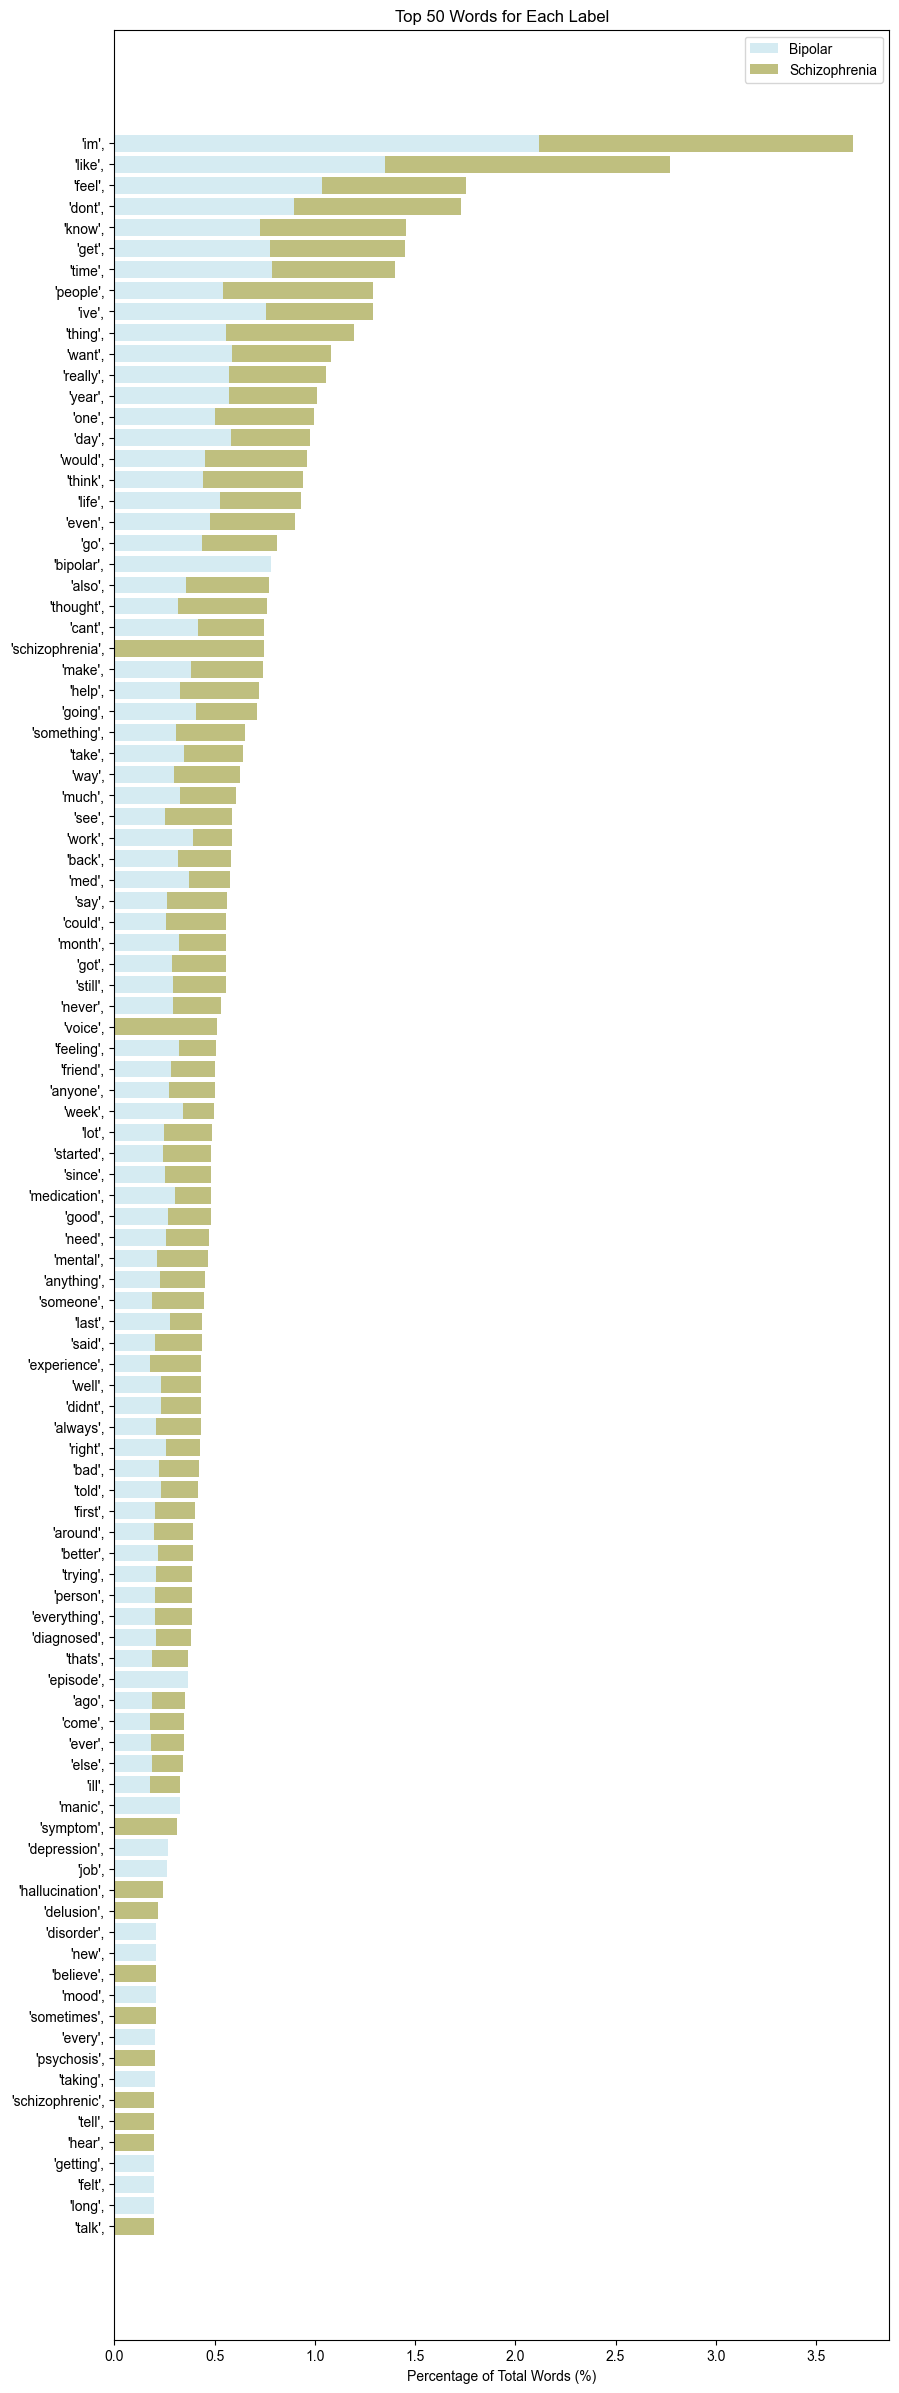

In [101]:
# Combine the two Series into a DataFrame
combined = pd.concat([top_100_0, top_100_1], axis=1, keys=['Label 0', 'Label 1'])
combined.fillna(0, inplace=True)  # replace NaN values with 0

# Calculate the total percentage for each word
combined['Total'] = combined['Label 0'] + combined['Label 1']

# Sort the DataFrame by the total percentage
combined.sort_values('Total', ascending=False, inplace=True)

# Plot the top words
plt.figure(figsize=(10, 30))
plt.barh(combined.index[:100], combined['Label 0'][:100], color='lightblue', label='Bipolar', alpha=0.5)
plt.barh(combined.index[:100], combined['Label 1'][:100], color='olive', left=combined['Label 0'][:100], label='Schizophrenia', alpha=0.5)
plt.title('Top 50 Words for Each Label')
plt.xlabel('Percentage of Total Words (%)')
plt.gca().invert_yaxis()  # invert the y-axis to have the most common word at the top
plt.legend()
plt.show()




In [100]:
word_found = "week"

#Find the count of a specific word "doctor", in each label
df_0['text'].str.count(word_found).sum()/df_1['text'].str.count(word_found).sum()

2.462962962962963

To be corrected code:

In [ ]:
# Calculate the ratio of the percentages for the two labels
combined['Ratio'] = combined['Label 0'] / combined['Label 1']
combined.replace([np.inf, -np.inf], np.nan, inplace=True)  # replace inf values with NaN
combined.dropna(inplace=True)  # drop rows with NaN values

# Sort the DataFrame by the ratio
combined.sort_values('Ratio', ascending=False, inplace=True)

# Plot the top words with the largest ratios
plt.figure(figsize=(10, 30))
plt.barh(combined.index[:100] + ' (' + combined['Ratio'][:100].round(2).astype(str) + ')', combined['Label 0'][:100], color='lightblue', label='Bipolar', alpha=0.5)
plt.barh(combined.index[:100] + ' (' + combined['Ratio'][:100].round(2).astype(str) + ')', combined['Label 1'][:100], color='olive', left=combined['Label 0'][:100], label='Schizophrenia', alpha=0.5)
plt.title('Top 100 Words with Largest Proportional Differences for Each Label')
plt.xlabel('Percentage of Total Words (%)')
plt.gca().invert_yaxis()  # invert the y-axis to have the most common word at the top
plt.legend()
plt.show()



Code correcting above

This creates a graph that sorts the words in order of discrepancy, first being Words found in Schizo : Words found in Bipolar

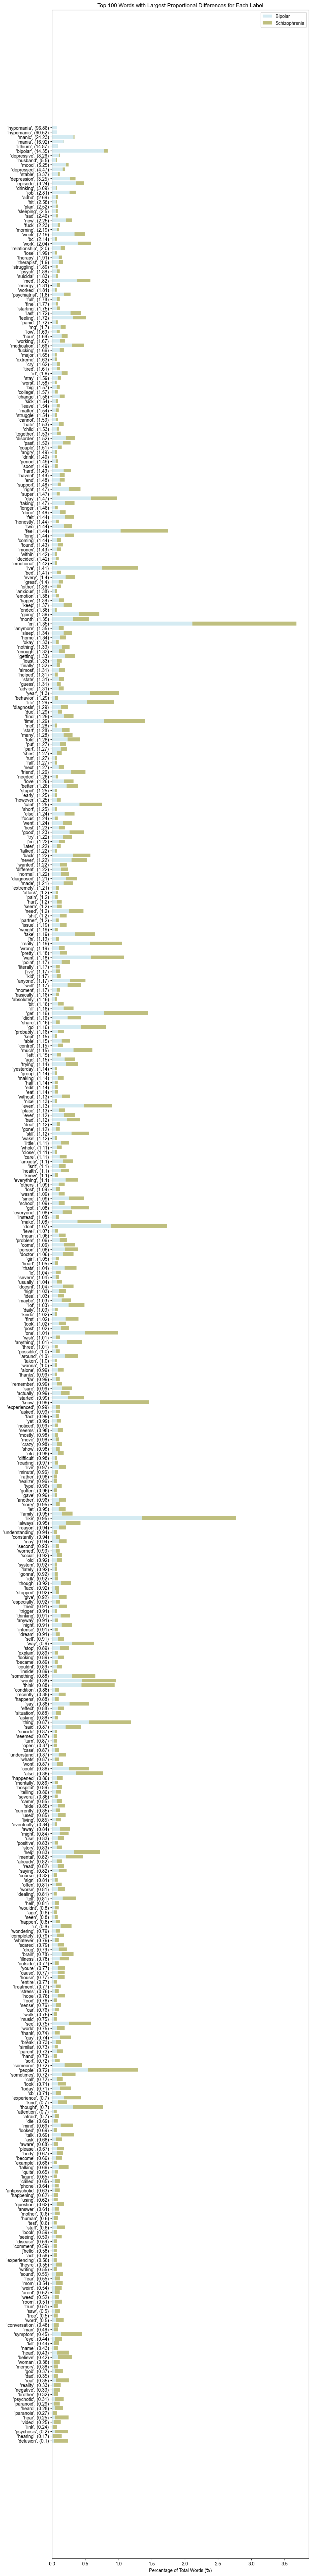

In [120]:
# Get the word counts for each label
word_counts_0 = pd.Series(' '.join(df_0['text']).split()).value_counts()
word_counts_1 = pd.Series(' '.join(df_1['text']).split()).value_counts()

# Calculate the percentage of the total tokenized words
word_percent_0 = word_counts_0 / len(' '.join(df_0['text']).split()) * 100
word_percent_1 = word_counts_1 / len(' '.join(df_1['text']).split()) * 100

# Combine the two Series into a DataFrame
combined = pd.concat([word_percent_0, word_percent_1], axis=1, keys=['Label 0', 'Label 1'])
combined.fillna(0, inplace=True)  # replace NaN values with 0

# Calculate the ratio of the percentages for the two labels
combined['Ratio'] = combined['Label 0'] / combined['Label 1']
combined.replace([np.inf, -np.inf], np.nan, inplace=True)  # replace inf values with NaN
combined.dropna(inplace=True)  # drop rows with NaN values

# Filter out words with a combined percentage of total words occurrence of less than 0.05
combined = combined[(combined['Label 0'] + combined['Label 1'] > 0.07)]

# Sort the DataFrame by the ratio and select the top 100 words
combined.sort_values('Ratio', ascending=False, inplace=True)
top_100 = combined[:500]

# Plot the top words with the largest differences
plt.figure(figsize=(10, 100))
plt.barh(top_100.index + ' (' + top_100['Ratio'].round(2).astype(str) + ')', top_100['Label 0'], color='lightblue', label='Bipolar', alpha=0.5)
plt.barh(top_100.index + ' (' + top_100['Ratio'].round(2).astype(str) + ')', top_100['Label 1'], color='olive', left=top_100['Label 0'], label='Schizophrenia', alpha=0.5)
plt.title('Top 100 Words with Largest Proportional Differences for Each Label')
plt.xlabel('Percentage of Total Words (%)')
plt.gca().invert_yaxis()  # invert the y-axis to have the most common word at the top
plt.legend()
plt.show()


This is the above code but adjusted for the magnitude of disparity

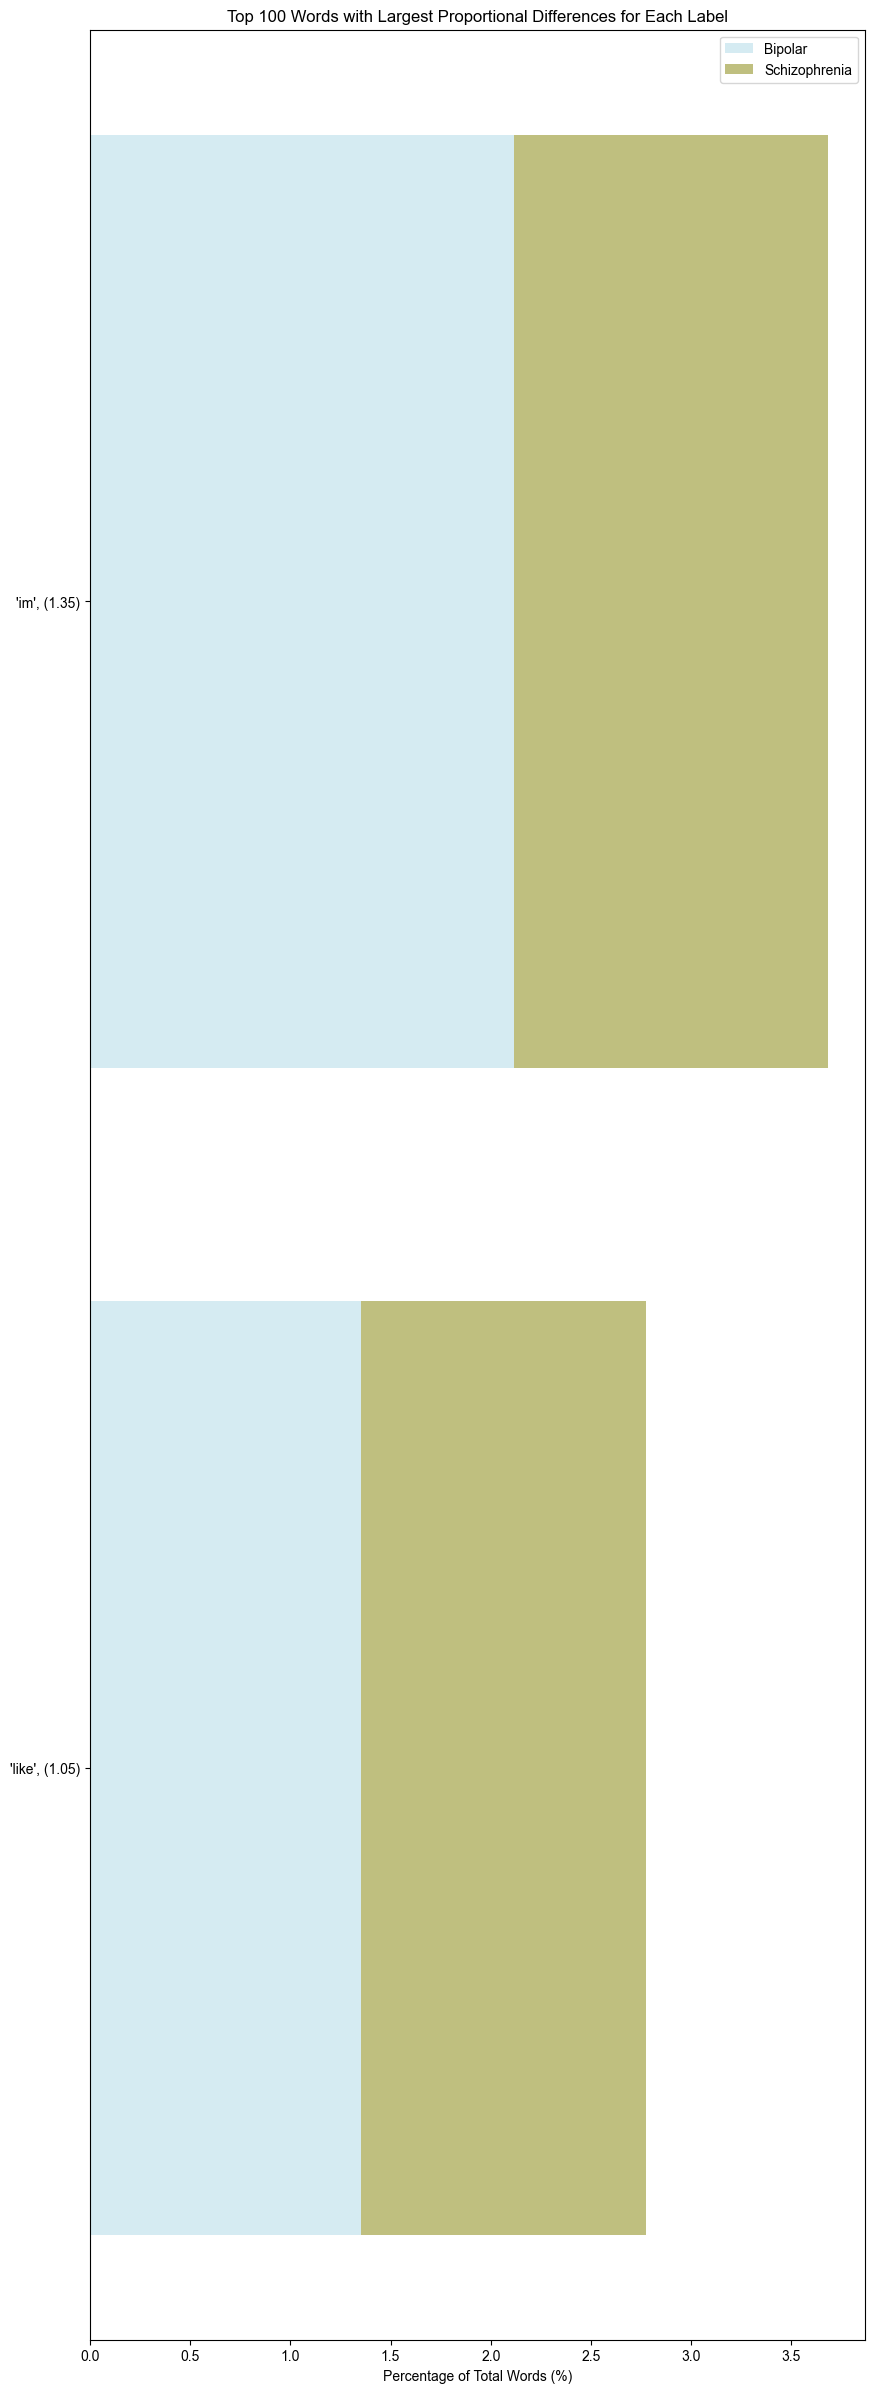

In [140]:
# Calculate the ratio of the percentages for the two labels
combined['Ratio'] = combined[['Label 0', 'Label 1']].max(axis=1) / combined[['Label 0', 'Label 1']].min(axis=1)
combined.replace([np.inf, -np.inf], np.nan, inplace=True)  # replace inf values with NaN
combined.dropna(inplace=True)  # drop rows with NaN values

# Filter out words with a combined percentage of total words occurrence of less than 0.05
combined = combined[(combined['Label 0'] + combined['Label 1'] > 0.02)]

# Sort the DataFrame by the ratio and select the top 100 words
combined.sort_values('Ratio', ascending=False, inplace=True)
top_100 = combined[:300]

# Plot the top words with the largest differences
plt.figure(figsize=(10, 30))
plt.barh(top_100.index + ' (' + top_100['Ratio'].round(2).astype(str) + ')', top_100['Label 0'], color='lightblue', label='Bipolar', alpha=0.5)
plt.barh(top_100.index + ' (' + top_100['Ratio'].round(2).astype(str) + ')', top_100['Label 1'], color='olive', left=top_100['Label 0'], label='Schizophrenia', alpha=0.5)
plt.title('Top 100 Words with Largest Proportional Differences for Each Label')
plt.xlabel('Percentage of Total Words (%)')
plt.gca().invert_yaxis()  # invert the y-axis to have the most common word at the top
plt.legend()
plt.show()


In [108]:
# Get the word counts for each label
word_counts_0 = pd.Series(' '.join(df_0['text']).split()).value_counts()
word_counts_1 = pd.Series(' '.join(df_1['text']).split()).value_counts()

# Calculate the percentage of the total tokenized words
word_percent_0 = word_counts_0 / len(' '.join(df_0['text']).split()) * 100
word_percent_1 = word_counts_1 / len(' '.join(df_1['text']).split()) * 100

# Combine the two Series into a DataFrame
combined = pd.concat([word_percent_0, word_percent_1], axis=1, keys=['Label 0', 'Label 1'])
combined.fillna(0, inplace=True)  # replace NaN values with 0

# Calculate the ratio of the percentages for the two labels
combined['Ratio'] = combined['Label 0'] / combined['Label 1']
combined.replace([np.inf, -np.inf], np.nan, inplace=True)  # replace inf values with NaN
combined.dropna(inplace=True)  # drop rows with NaN values

# Filter out words with a combined percentage of total words occurrence of less than 0.05
combined = combined[(combined['Label 0'] + combined['Label 1'] > 0.05)]

# Sort the DataFrame by the difference and select the top 100 words
combined.sort_values('Difference', ascending=False, inplace=True)
top_100 = combined[:100]

# Plot the top words with the largest differences
plt.figure(figsize=(10, 30))
plt.barh(top_100.index + ' (' + top_100['Ratio'].round(2).astype(str) + ')', top_100['Label 0'], color='lightblue', label='Bipolar', alpha=0.5)
plt.barh(top_100.index + ' (' + top_100['Ratio'].round(2).astype(str) + ')', top_100['Label 1'], color='olive', left=top_100['Label 0'], label='Schizophrenia', alpha=0.5)
plt.title('Top 100 Words with Largest Proportional Differences for Each Label')
plt.xlabel('Percentage of Total Words (%)')
plt.gca().invert_yaxis()  # invert the y-axis to have the most common word at the top
plt.legend()
plt.show()


KeyError: 'Difference'

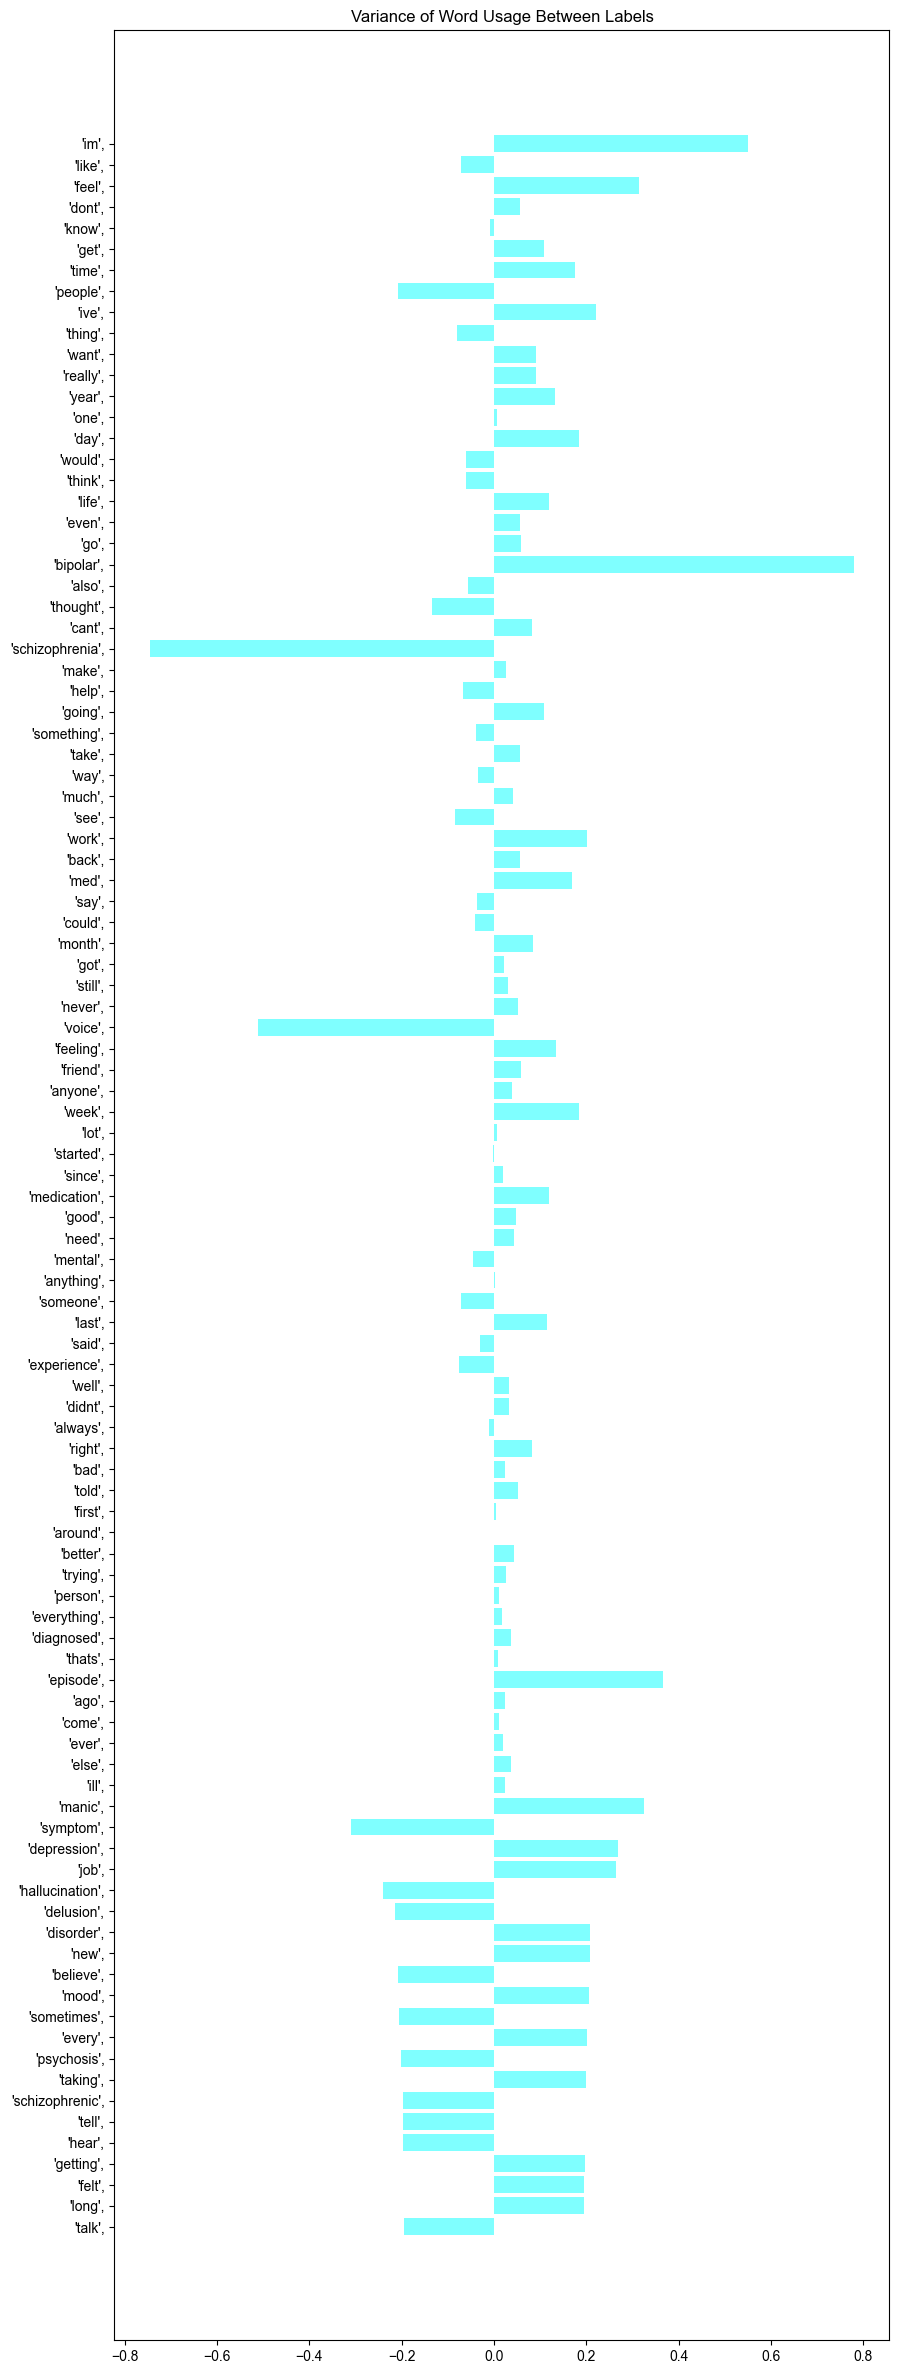

In [66]:
#Find out which label has a greater variance in word usage
# Get the top 100 words for each label
top_100_0 = pd.Series(' '.join(df_0['text']).split()).value_counts()[:100]
top_100_1 = pd.Series(' '.join(df_1['text']).split()).value_counts()[:100]

# Calculate the percentage of the total tokenized words
top_100_0 = top_100_0 / len(' '.join(df_0['text']).split()) * 100
top_100_1 = top_100_1 / len(' '.join(df_1['text']).split()) * 100

# Combine the two Series into a DataFrame
combined = pd.concat([top_100_0, top_100_1], axis=1, keys=['Label 0', 'Label 1'])
combined.fillna(0, inplace=True)  # replace NaN values with 0

# Calculate the total percentage for each word
combined['Total'] = combined['Label 0'] + combined['Label 1']

# Sort the DataFrame by the total percentage
combined.sort_values('Total', ascending=False, inplace=True)

# Plot the top words
plt.figure(figsize=(10, 30))

# Calculate the variance for each word
combined['Variance'] = combined['Label 0'] - combined['Label 1']

# Plot the variance
plt.barh(combined.index[:100], combined['Variance'][:100], color='cyan', alpha=0.5)
plt.title('Variance of Word Usage Between Labels')

plt.gca().invert_yaxis()  # invert the y-axis to have the most common word at the top
plt.show()



In [19]:
#ngram 3 words for label 1 
cv = CountVectorizer(stop_words=stop_words, ngram_range=(3, 3))
X = cv.fit_transform(df_1['text'])
df_1_ngram = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

# Find the top 30 ngrams for label 0
top_30_1 = df_1_ngram.sum().sort_values(ascending=False)[:30]

# Calculate the percentage of the total ngrams
top_30_1 = top_30_1 / top_30_1.sum() * 100

#print the top 30 ngrams
print(top_30_1)

feel like im                        8.355438
schizophrenia youtube channel       5.172414
attached today video                5.039788
today video link                    5.039788
video link conquering               5.039788
video ever brief                    5.039788
like today video                    5.039788
today video ever                    5.039788
conquering schizophrenia youtube    5.039788
link conquering schizophrenia       5.039788
ever brief viewed                   5.039788
youtube channel today               5.039788
channel today entail                4.907162
brief viewed amid                   4.641910
hope youre happy                    2.519894
happy elizabethi hope               2.387268
youre happy elizabethi              2.387268
elizabethi hope youre               2.387268
im year old                         1.989390
mental health issue                 1.724138
dont even know                      1.591512
dont hear voice                     1.458886
dont know 

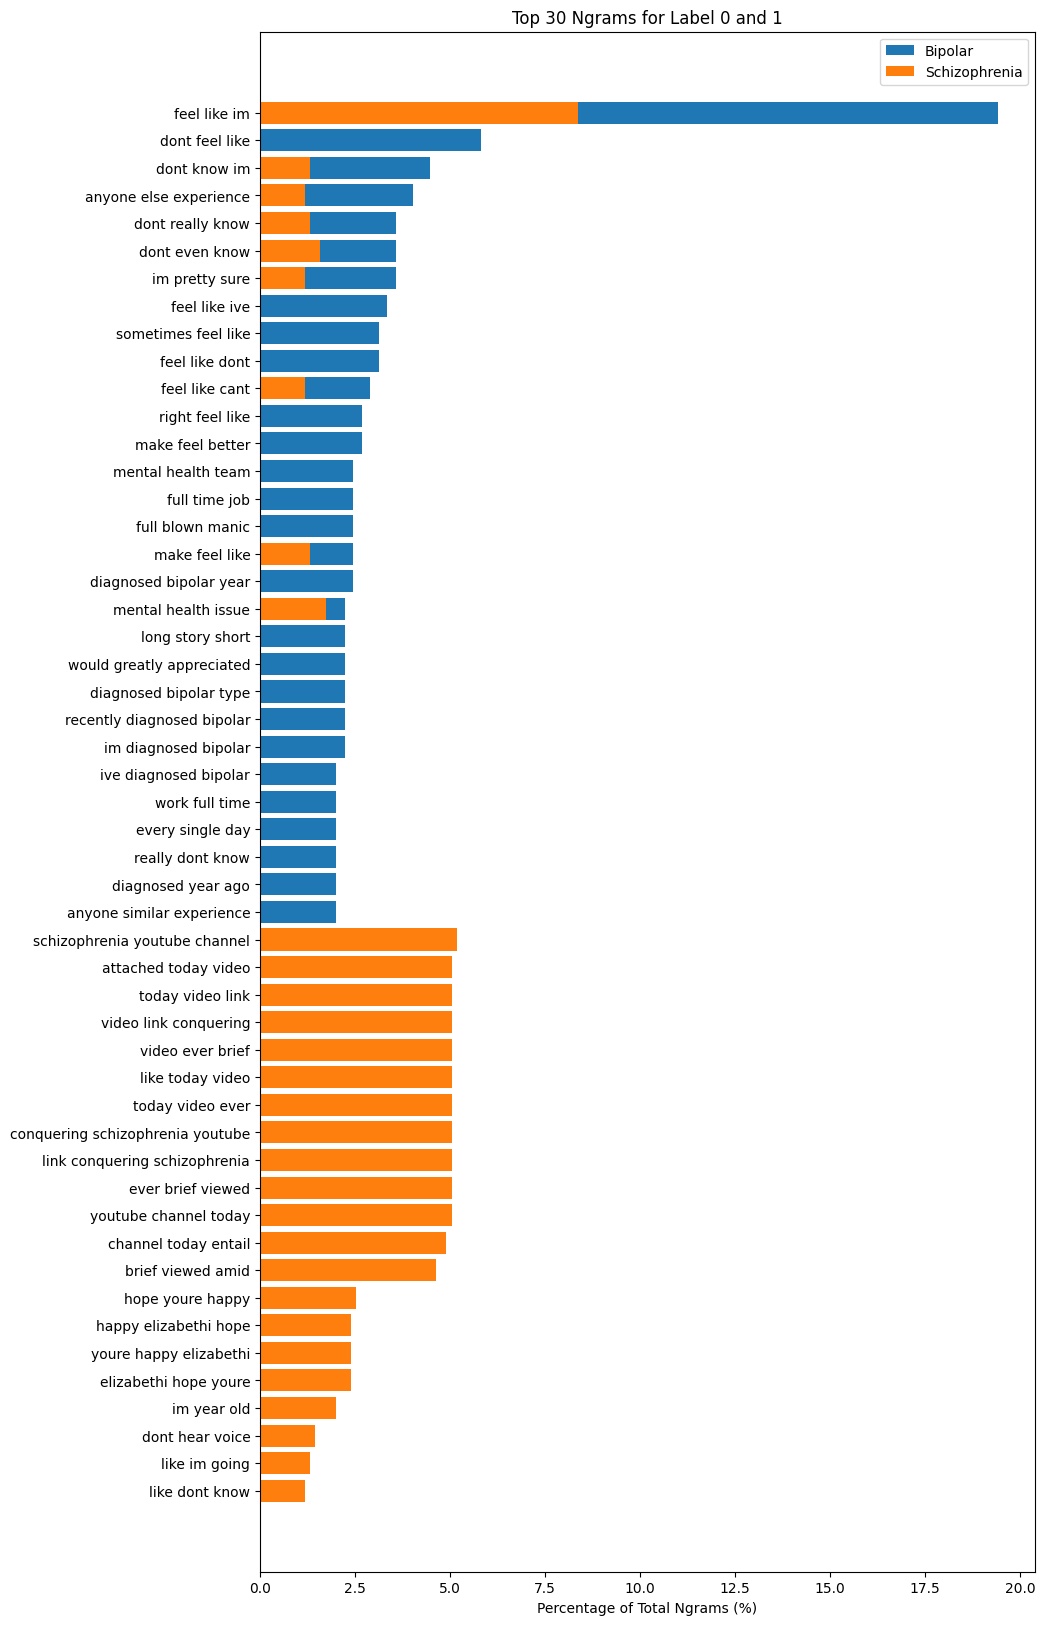

In [26]:
#Create a plot chart for the top 30 ngrams for both label 1 and 0, overlaying their bar charts
plt.figure(figsize=(10, 20))
plt.barh(top_30.index, top_30.values, label='Bipolar')
plt.barh(top_30_1.index, top_30_1.values, label='Schizophrenia')
plt.title('Top 30 Ngrams for Label 0 and 1')
plt.xlabel('Percentage of Total Ngrams (%)')


plt.gca().invert_yaxis()  # invert the y-axis to have the most common word at the top
plt.legend()
plt.show()